## Preparation time

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statistics # for variance
from scipy import stats # calculate trimmed mean

pd.set_option('display.max_rows', 426)

na_vals = ['-1', 1]
indian_food = pd.read_csv("indian_food.csv", na_values=na_vals)
indian_food['ingredients'] = indian_food['ingredients'].apply(lambda x: x.lower())

In [2]:
indian_food['num_ingr'] = indian_food['ingredients'].apply(lambda x: len(x.split(',')))

In [3]:
indian_food.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,num_ingr
0,Balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,4
1,Boondi,"gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,3


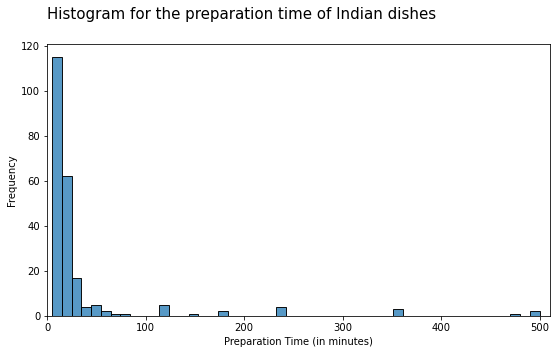

In [4]:
plt.figure(figsize=(9,5))
sns.histplot(indian_food, x="prep_time", bins= 50)
plt.title("Histogram for the preparation time of Indian dishes", fontsize=15, loc='left', y=1.07)
plt.xlabel("Preparation Time (in minutes)")
plt.ylabel("Frequency")
plt.xlim(0, 510)

plt.show()

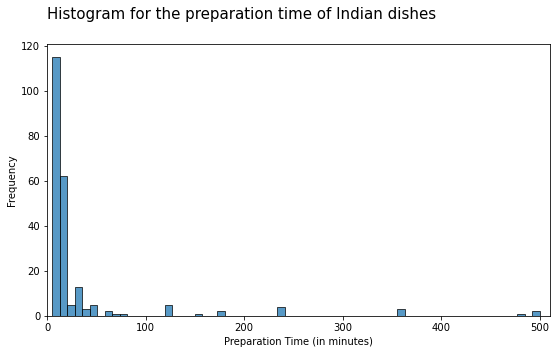

In [5]:
plt.figure(figsize=(9,5))
sns.histplot(indian_food, x="prep_time", bins= 65)
plt.title("Histogram for the preparation time of Indian dishes", fontsize=15, loc='left', y=1.07)
plt.xlabel("Preparation Time (in minutes)")
plt.ylabel("Frequency")
plt.xlim(0, 510)

plt.show()

C:\Users\keelji\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


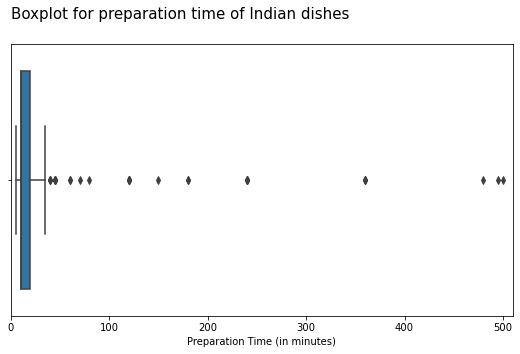

In [17]:
plt.figure(figsize=(9,5))
sns.boxplot(indian_food['prep_time'], data=indian_food) #, color='magenta', palette='PuBuGn_r'
plt.title("Boxplot for preparation time of Indian dishes", fontsize=15, loc='left', y=1.07)
plt.xlabel("Preparation Time (in minutes)") #, color='grey'
plt.xlim(0, 510)

plt.show()

In [7]:
# axis=1 for column and axis=0 for row
indian_food[indian_food['prep_time']<=10].count(axis=0)

name              114
ingredients       114
diet              114
prep_time         114
cook_time         114
flavor_profile    101
course            114
state             105
region            107
num_ingr          114
dtype: int64

In [8]:
indian_food[indian_food['prep_time']>50].count(axis=0)

name              22
ingredients       22
diet              22
prep_time         22
cook_time         22
flavor_profile    18
course            22
state             18
region            22
num_ingr          22
dtype: int64

In [9]:
indian_food[indian_food['prep_time']<=10].isna().sum()

name               0
ingredients        0
diet               0
prep_time          0
cook_time          0
flavor_profile    13
course             0
state              9
region             7
num_ingr           0
dtype: int64

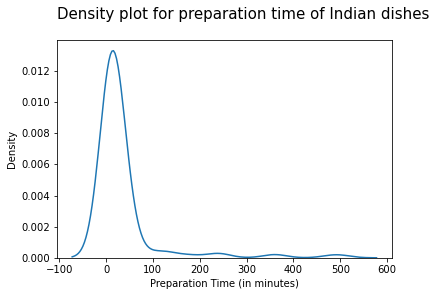

In [10]:
plt.figure()
sns.kdeplot(data=indian_food, x='prep_time')
plt.title("Density plot for preparation time of Indian dishes", fontsize=15, loc='left', y=1.07)
plt.xlabel("Preparation Time (in minutes)") #, color='grey'
#plt.xlim(0, 600)

plt.show()

C:\Users\keelji\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


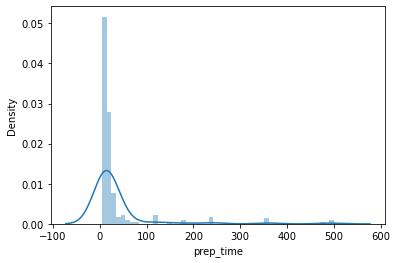

In [11]:
plt.figure()
sns.distplot(a=indian_food.prep_time)

plt.show()

C:\Users\keelji\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


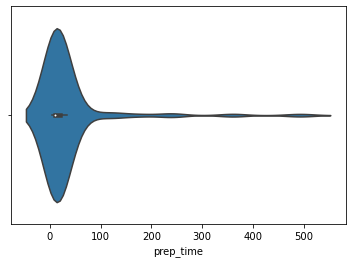

In [12]:
plt.figure()
sns.violinplot(indian_food['prep_time'])

plt.show()

C:\Users\keelji\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


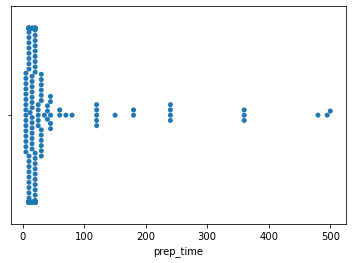

In [13]:
sns.swarmplot(x=indian_food["prep_time"])
plt.show()

In [14]:
round(indian_food['prep_time'].describe(),1)

count    225.0
mean      35.4
std       76.2
min        5.0
25%       10.0
50%       10.0
75%       20.0
max      500.0
Name: prep_time, dtype: float64

In [15]:
round(indian_food.describe(),1)

,prep_time,cook_time,num_ingr
count,225.0,227.0,255.0
mean,35.4,38.9,4.5
std,76.2,49.4,1.2
min,5.0,2.0,2.0
25%,10.0,20.0,4.0
50%,10.0,30.0,5.0
75%,20.0,45.0,5.0
max,500.0,720.0,10.0


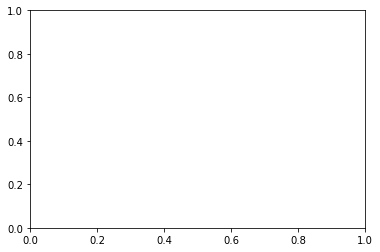

In [16]:
plt.grid(False)